## librerias

In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import scipy.interpolate as interpolate

## Lectura del csv y creacion de un Dataframe

In [16]:
# Leer el archivo CSV y almacenarlo en un DataFrame
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

## Verificamos que no haya datos duplicados.

In [17]:
print(df_Latam.duplicated().sum())


0


## Iniciamos el trabajo con una exploracion estadistica de las columnas

In [18]:
# Descripcion estadistica de cada columna
for i in df_Latam.columns:
    print (i)
    print (round(df_Latam[i].describe()),2)
    print ("_________________________________________________")

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object 2
_________________________________________________
date
count           3750
unique           625
top       2021-01-01
freq               6
Name: date, dtype: object 2
_________________________________________________
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object 2
_________________________________________________
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object 2
_________________________________________________
new_confirmed
count      3750.0
mean      13847.0
std       24212.0
min        -573.0
25%        1511.0
50%        5102.0
75%       14802.0
max      298408.0
Name: new_confirmed, dtype: float64 2
_________________________________________________
new_deceased
count     3750.0
mean       276.0
std        507.0
min          0.0
25%      

## Se observan algunas inconsistencias como el tipo de dato objeto para la fecha o valores minimos negativos que deberian ser positivos. Procedemos a normalizar estos datos para mejorar la calidad de los mismos.

In [19]:
# Se modifica el tipo de dato de fecha
df_Latam["date"] = pd.to_datetime(df_Latam["date"], format="%Y-%m-%d")


In [20]:
# se verifica el cambio
print(df_Latam["date"].dtype)

datetime64[ns]


## Se transforman los valores negativos a positivos de las columnas  new_confirmed, new_deceased y new_recovered

In [21]:
# Convierte los valores negativos a positivos en las columnas
df_Latam['new_confirmed'] = df_Latam['new_confirmed'].abs()
df_Latam['new_deceased'] = df_Latam['new_deceased'].abs()
df_Latam['new_recovered'] = df_Latam['new_recovered'].abs()

## Se realiza una segunda exploracion descriptiva de las columnas pero esta vez solo con algunos calculos estadisticos .

In [22]:
# Obtengo mediante una funcion la mediana, varianza y rango
def calculos_primarios (data):
    for i in data:
        if data[i].dtype == "float64" or data[i].dtype == "int64":
            print (i)
            print ("Mediana: ", data[i].median())
            print ("Moda: ", data[i].mode())
            print ("Varianza: ", data[i].var())
            print ("Maximo: ", data[i].max())
            print ("Minimo: ",data[i].min())
            print ("Rango: ",data[i].max() - data[i].min())
            print ("________________________")#Se imprime esta fila para dividir la infomracion por columnas y facilitar la legibilidad 
calculos_primarios (df_Latam)


new_confirmed
Mediana:  5102.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Varianza:  586226395.4063854
Maximo:  298408.0
Minimo:  0.0
Rango:  298408.0
________________________
new_deceased
Mediana:  98.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Varianza:  257255.9058042145
Maximo:  11447.0
Minimo:  0.0
Rango:  11447.0
________________________
cumulative_confirmed
Mediana:  2876984.0
Moda:  0    4597637.0
Name: cumulative_confirmed, dtype: float64
Varianza:  34316623551669.492
Maximo:  26892860.0
Minimo:  727.0
Rango:  26892133.0
________________________
cumulative_deceased
Mediana:  90456.5
Moda:  0    115137.0
Name: cumulative_deceased, dtype: float64
Varianza:  15997076627.013062
Maximo:  490254.0
Minimo:  52.0
Rango:  490202.0
________________________
cumulative_vaccine_doses_administered
Mediana:  47713014.0
Moda:  0    209673612.0
Name: cumulative_vaccine_doses_administered, dtype: float64
Varianza:  8747794082611842.0
Maximo:  347868481.0
Minimo:  18.0
Rango:  

## Se observan falta de datos en las columnas rainfall y cumulative_recovered, en general se necesita explorar graficas para visualizar mas informacion.

In [23]:
# Se selecciona los paises de interes para el desarrollo del estudio

paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brasil']

## creamos una lista con el nombre de cada columna

In [24]:
lista_columnas = list(df_Latam)
print(lista_columnas)

['location_key', 'date', 'country_code', 'country_name', 'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate

## Se realizar una matriz de correlacion para ver relacion que existe entre las variables

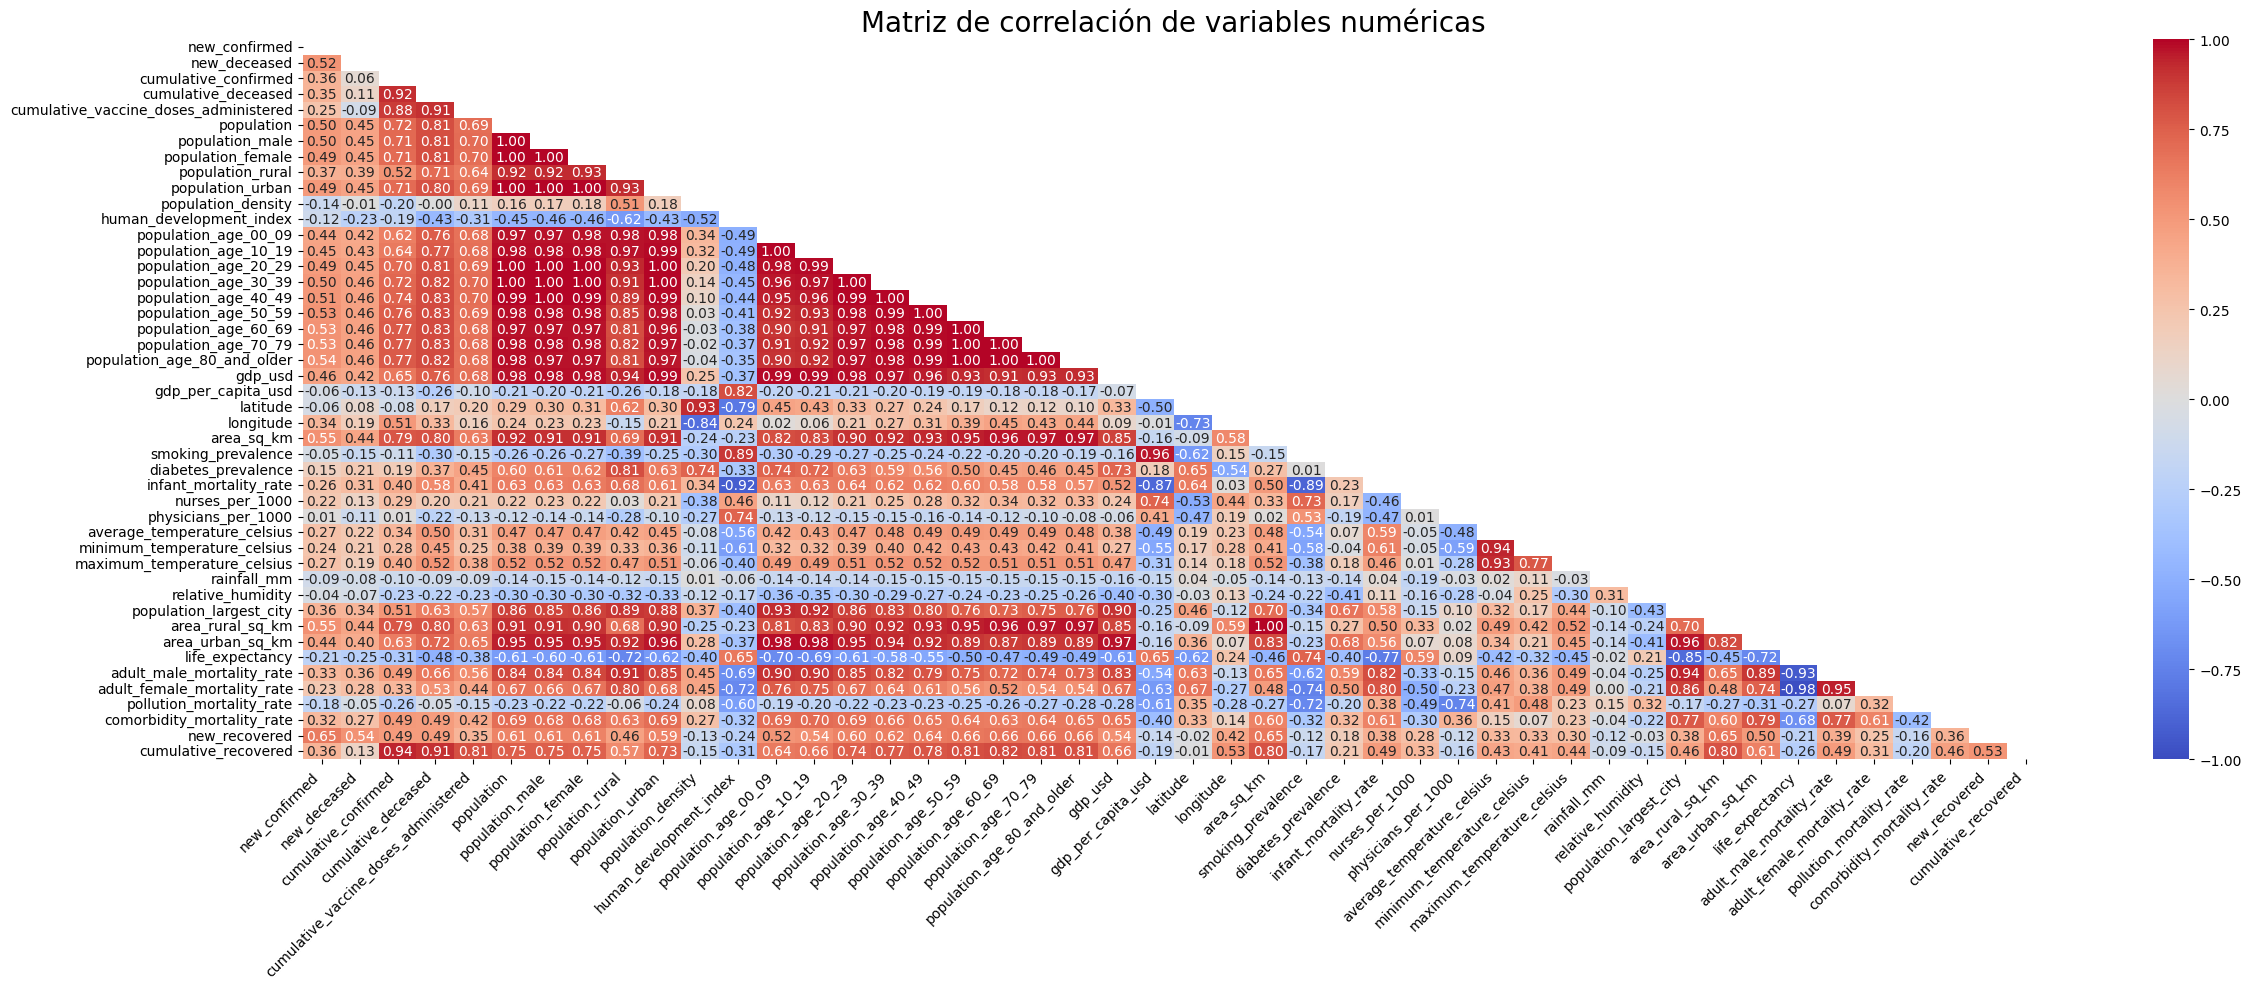

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Crear matriz de correlación
numeric_columns = df_Latam.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_Latam[numeric_columns].corr()

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el mapa de calor
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', 
                      vmin=-1, vmax=1, annot_kws={"size": 10})

# Añadir título
plt.title("Matriz de correlación de variables numéricas", fontsize=20)

# Ajustar diseño del gráfico
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()


La matriz de correlación revela relaciones significativas entre diversos factores del COVID-19 en Latinoamérica, destacando:

1. Mortalidad por género:
La mortalidad masculina por COVID-19 es mayor en todas las franjas etarias, evidenciando una mayor vulnerabilidad del género masculino.

2. Comorbilidad y mortalidad:
Se observa una alta correlación entre la presencia de comorbilidades y la tasa de mortalidad por COVID-19, tanto en hombres como en mujeres.

3. Vacunación y casos confirmados:
Existe una correlación negativa entre la tasa de vacunación y el número de casos confirmados, indicando que la vacunación reduce la probabilidad de contraer el virus.

4. Densidad poblacional y casos confirmados:
Se observa una correlación positiva entre la densidad poblacional y el número de casos confirmados, sugiriendo que la concentración de personas facilita la transmisión del virus.

5. PIB per cápita y casos confirmados:
La correlación entre PIB per cápita y casos confirmados es insignificante, indicando que el nivel de ingresos no tiene un impacto determinante en la cantidad de casos.

6. PIB per cápita y muertes:
Se observa una correlación negativa entre PIB per cápita y muertes por COVID-19, sugiriendo que los países con mayor ingreso tienen mejores recursos para enfrentar la pandemia y reducir la mortalidad.

En general, la matriz de correlación proporciona información valiosa sobre las relaciones entre diversos factores del COVID-19 en Latinoamérica.

Es importante destacar que estas correlaciones no implican necesariamente relaciones causales, y se requiere un análisis más profundo para comprender los mecanismos subyacentes.

## En una grafica de barras vemos la cantidad de nuevos casos en cada pais

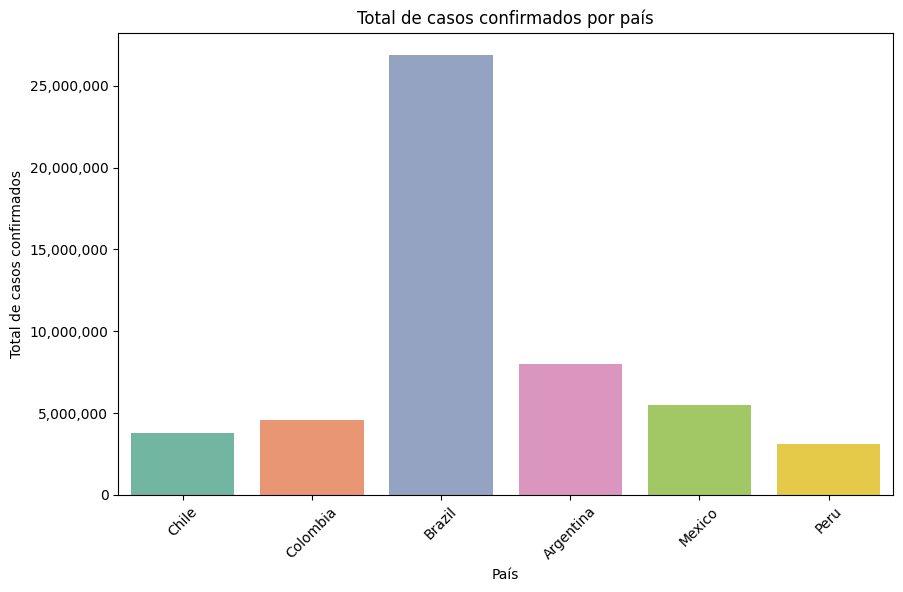

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Cargar el DataFrame desde el archivo CSV proporcionado
df_Latam = pd.read_csv('data_latinoamerica_clean.csv')

# trabajamos con las columnas 'country_name', 'date' y 'new_confirmed'
df_Latam['date'] = pd.to_datetime(df_Latam['date'])  # Asegurarse de que la columna de fecha esté en el formato correcto
df_Latam = df_Latam.sort_values(by=['country_name', 'date'])  # Ordenar por país y fecha

# Calcular los casos totales confirmados acumulados
df_Latam['total_confirmed'] = df_Latam.groupby('country_name')['new_confirmed'].cumsum()

# Filtrar el DataFrame para obtener los datos más recientes de cada país
df_latest = df_Latam.sort_values('date').groupby('country_name').tail(1)

# Seleccionar el color
colors = sns.color_palette("Set2", len(df_Latam['country_name'].unique()))

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='country_name', y='total_confirmed', data=df_latest, ax=ax, hue='country_name', dodge=False, palette=colors)
plt.title('Total de casos confirmados por país')
plt.xlabel('País')
plt.ylabel('Total de casos confirmados')
plt.xticks(rotation=45)  # Rotar los nombres de los países si son muchos y se superponen
plt.legend([],[], frameon=False)  # Ocultar la leyenda si no es necesaria

# Formatear el eje y para evitar notación científica
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


El gráfico muestra una distribución desigual de casos confirmados de COVID-19 en los países latinoamericanos analizados, con Brasil a la cabeza.

Brasil presenta la mayor cantidad de casos confirmados, seguido de Argentina, Colombia, Chile, México y Perú.

La diferencia en el número de casos confirmados entre los países podría atribuirse a diversos factores, como:

Tamaño de la población: Brasil tiene la población más grande de los países analizados, lo que aumenta su probabilidad de tener un mayor número de casos.
Densidad poblacional: Brasil también tiene una de las densidades de población más altas de la región, lo que facilita la transmisión del virus.
Medidas de control: La implementación y efectividad de las medidas de control de la pandemia, como el distanciamiento social, el uso de máscaras y las campañas de vacunación, podrían haber variado entre los países.
Capacidad de testeo: La disponibilidad y accesibilidad de las pruebas de COVID-19 podrían haber influido en el número de casos confirmados en cada país.
Es importante destacar que el número de casos confirmados no refleja necesariamente la prevalencia real del virus en cada país, ya que los criterios de testeo y la tasa de asintomáticos pueden variar.

Sin embargo, el gráfico proporciona una visión general del impacto del COVID-19 en los países latinoamericanos y permite identificar áreas de mayor riesgo y necesidad de intervención.

## se verifican los valores  para buscar valores duplicados 

In [27]:
# Obtener todas las filas duplicadas (incluyendo la primera ocurrencia)
all_duplicates = df_Latam[df_Latam.duplicated(keep=False)]

# Agrupar por todas las columnas y contar las ocurrencias
duplicates_summary = all_duplicates.groupby(list(df_Latam.columns)).size().reset_index(name='count')

# Filtrar para mostrar solo las filas que se duplican más de una vez
duplicates_summary = duplicates_summary[duplicates_summary['count'] > 1]

print(duplicates_summary)


Empty DataFrame
Columns: [location_key, date, country_code, country_name, new_confirmed, new_deceased, cumulative_confirmed, cumulative_deceased, cumulative_vaccine_doses_administered, population, population_male, population_female, population_rural, population_urban, population_density, human_development_index, population_age_00_09, population_age_10_19, population_age_20_29, population_age_30_39, population_age_40_49, population_age_50_59, population_age_60_69, population_age_70_79, population_age_80_and_older, gdp_usd, gdp_per_capita_usd, latitude, longitude, area_sq_km, smoking_prevalence, diabetes_prevalence, infant_mortality_rate, nurses_per_1000, physicians_per_1000, average_temperature_celsius, minimum_temperature_celsius, maximum_temperature_celsius, rainfall_mm, relative_humidity, population_largest_city, area_rural_sq_km, area_urban_sq_km, life_expectancy, adult_male_mortality_rate, adult_female_mortality_rate, pollution_mortality_rate, comorbidity_mortality_rate, new_recove

# Analisis de como afecta la temperatura ambiente al aumento de casos de COVID-19

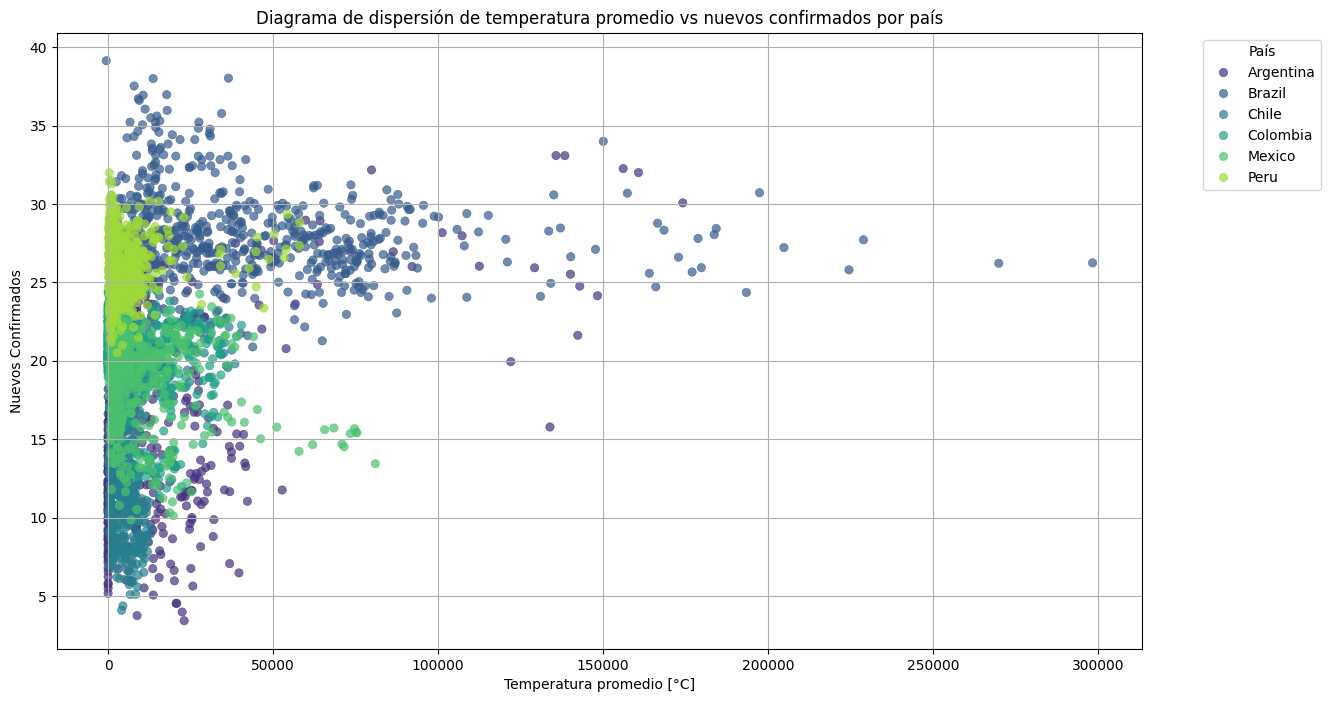

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")


# Asegurarse de que las columnas sean del tipo correcto
df_Latam['average_temperature_celsius'] = pd.to_numeric(df_Latam['average_temperature_celsius'], errors='coerce')
df_Latam['new_confirmed'] = pd.to_numeric(df_Latam['new_confirmed'], errors='coerce')

# Crear el diagrama de dispersión
plt.figure(figsize=(14, 8))
sns.scatterplot(y='average_temperature_celsius', x='new_confirmed', data=df_Latam, hue='country_name', palette='viridis', alpha=0.7, edgecolor=None)

plt.title('Diagrama de dispersión de temperatura promedio vs nuevos confirmados por país')
plt.xlabel('Temperatura promedio [°C]')
plt.ylabel('Nuevos Confirmados')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Si bien el gráfico sugiere una correlación entre la temperatura promedio y el aumento de casos COVID-19 en países cálidos, no se puede establecer una relación causal. Factores como densidad poblacional, comportamientos sociales y capacidad de testeo pueden influir. Se requiere un análisis más profundo para determinar la causalidad.

Es importante considerar la temperatura como un posible factor de riesgo y tomar medidas preventivas en climas cálidos, como distanciamiento social, uso de máscaras y ventilación adecuada.

# Analisis de como afecta la temperatura ambiente al aumento de deceso por COVID-19

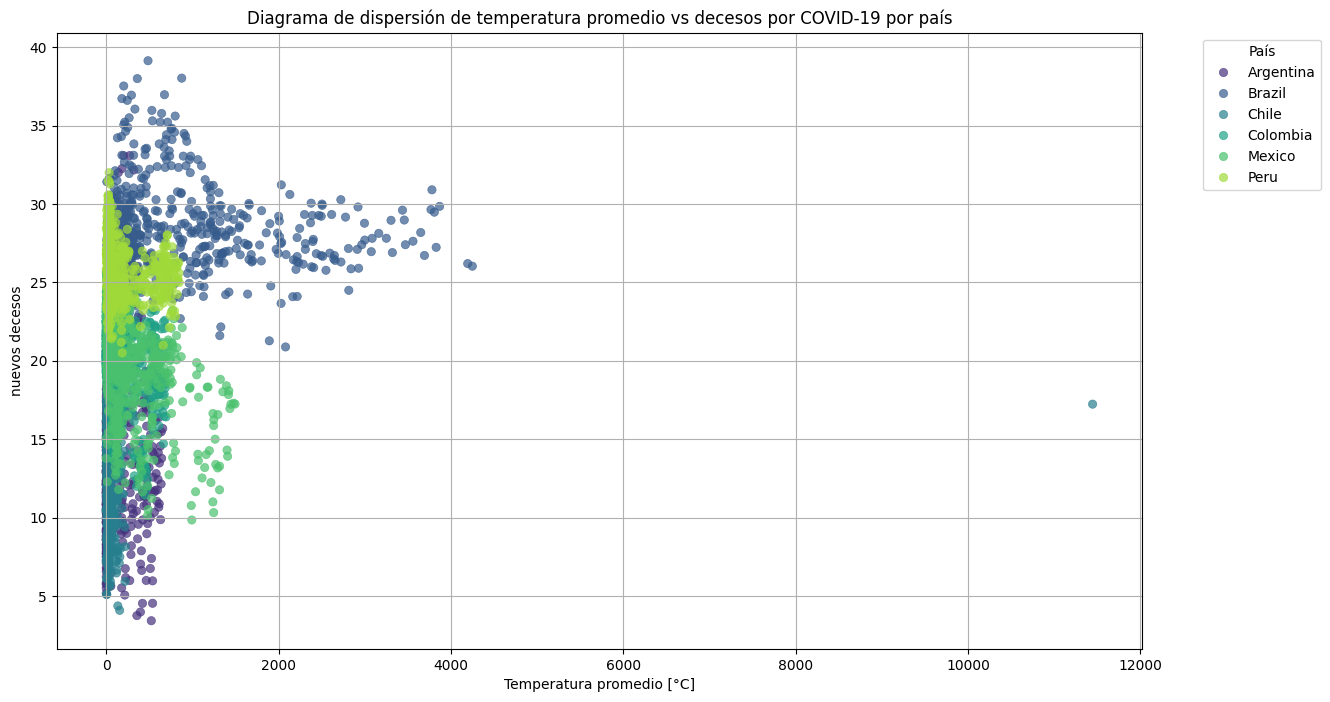

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")


# Asegurarse de que las columnas sean del tipo correcto
df_Latam['average_temperature_celsius'] = pd.to_numeric(df_Latam['average_temperature_celsius'], errors='coerce')
df_Latam['new_confirmed'] = pd.to_numeric(df_Latam['new_confirmed'], errors='coerce')

# Crear el diagrama de dispersión
plt.figure(figsize=(14, 8))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=df_Latam, hue='country_name', palette='viridis', alpha=0.7, edgecolor=None)

plt.title('Diagrama de dispersión de temperatura promedio vs decesos por COVID-19 por país')
plt.xlabel('Temperatura promedio [°C]')
plt.ylabel('nuevos decesos')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


El gráfico sugiere una correlación entre temperatura promedio y decesos COVID-19 en países cálidos, pero no se establece una relación causal.

Factores como enfermedades crónicas, calidad de la atención médica y efectos indirectos del calor pueden influir.

Se requiere un análisis más profundo para determinar la causalidad.

Es importante considerar la temperatura como un posible factor de riesgo y tomar medidas preventivas en climas cálidos, como vacunación de grupos vulnerables, mejora del acceso a atención médica y campañas de salud pública sobre los riesgos del calor.

# Graficar de vacunas administradas

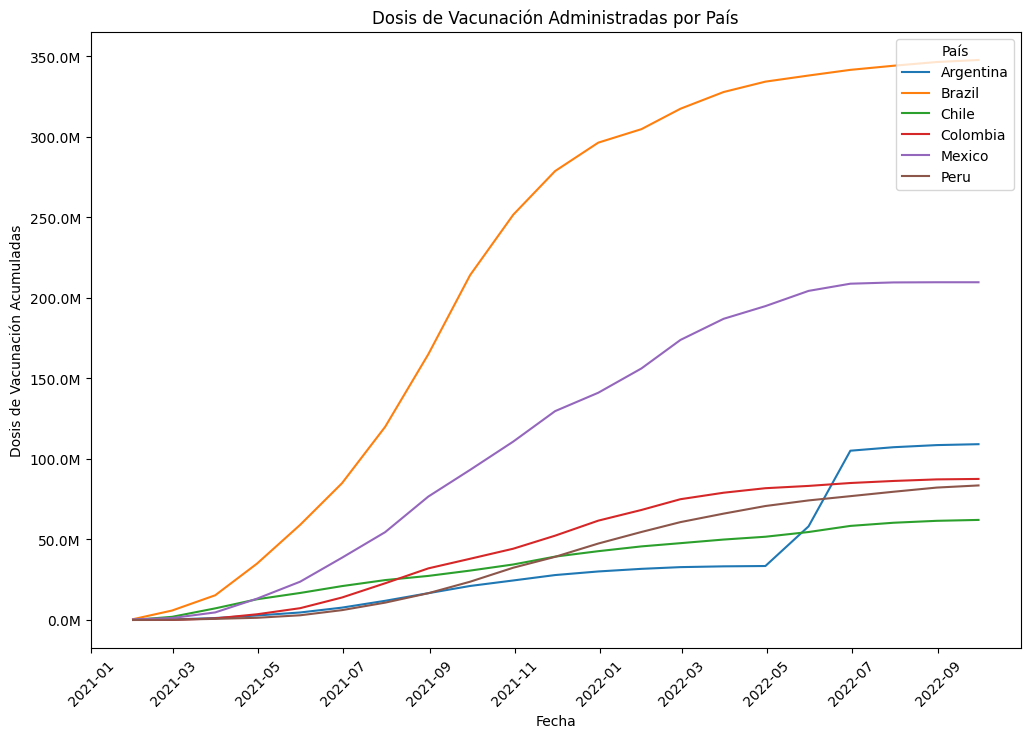

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Asegurarse de que la columna 'date' esté en el formato de fecha
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Definir la lista de países de interés
paises = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']  # Ejemplo de lista de países

# Filtrar los datos para los países seleccionados
data_paises = df_Latam[df_Latam['country_name'].isin(paises)]

# Establecer la columna 'date' como índice para poder usar Grouper
data_paises.set_index('date', inplace=True)

# Calcular el promedio mensual de las dosis acumuladas para cada país
promedio_dosis = data_paises.groupby(['country_name', pd.Grouper(freq='ME')])['cumulative_vaccine_doses_administered'].mean().reset_index()

# Crear el gráfico de líneas con datos no interpolados
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='cumulative_vaccine_doses_administered', hue='country_name', data=promedio_dosis, errorbar=None)

# Formatear el eje y para mostrar valores en millones
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Dosis de Vacunación Administradas por País')
plt.xlabel('Fecha')
plt.ylabel('Dosis de Vacunación Acumuladas')
plt.xticks(rotation=45)
plt.legend(title='País', loc='upper right')
plt.show()


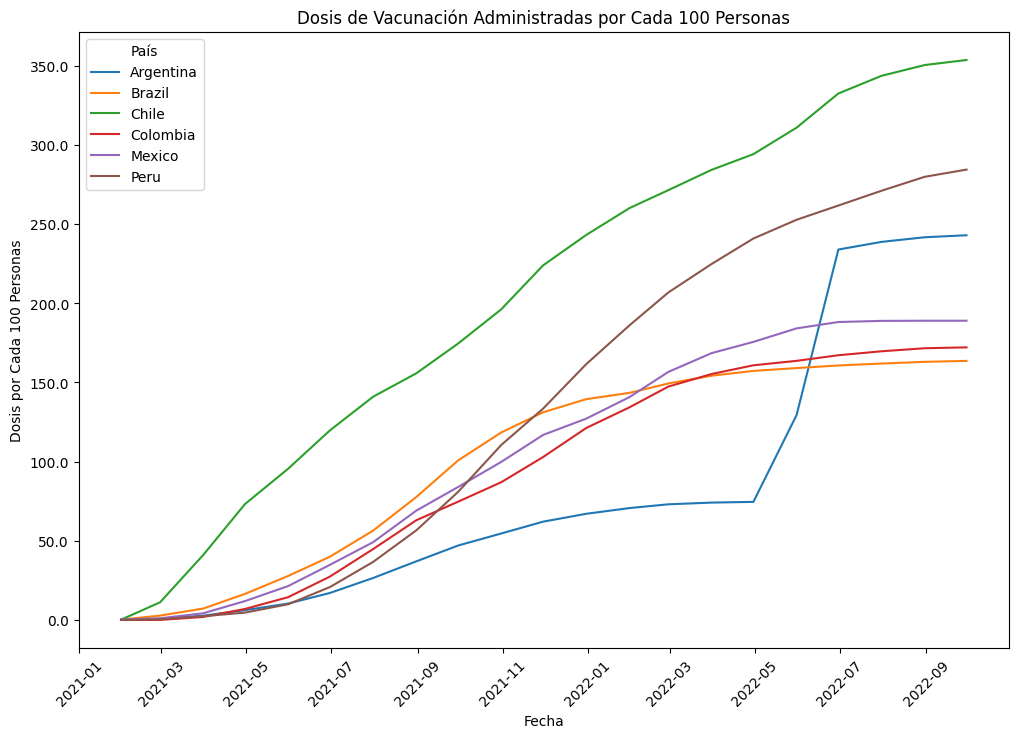

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Asegurarse de que la columna 'date' esté en el formato de fecha
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Definir la lista de países de interés
paises = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']  # Ejemplo de lista de países

# Filtrar los datos para los países seleccionados
data_paises = df_Latam[df_Latam['country_name'].isin(paises)]

# Asegurarse de que la columna 'population' esté en el DataFrame y no tenga valores nulos
if 'population' not in data_paises.columns or data_paises['population'].isnull().any():
    raise ValueError("La columna 'population' no está presente en el DataFrame o contiene valores nulos.")

# Establecer la columna 'date' como índice para poder usar Grouper
data_paises.set_index('date', inplace=True)

# Calcular el promedio mensual de las dosis acumuladas para cada país
promedio_dosis = data_paises.groupby(['country_name', pd.Grouper(freq='ME')])['cumulative_vaccine_doses_administered'].mean().reset_index()

# Calcular las dosis por cada 100 personas
promedio_dosis = promedio_dosis.merge(data_paises[['country_name', 'population']].drop_duplicates(), on='country_name')
promedio_dosis['doses_per_100'] = (promedio_dosis['cumulative_vaccine_doses_administered'] / promedio_dosis['population']) * 100

# Crear el gráfico de líneas con datos no interpolados
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='doses_per_100', hue='country_name', data=promedio_dosis, errorbar=None)

# Formatear el eje y para mostrar valores por cada 100 personas
formatter = FuncFormatter(lambda x, pos: f'{x:.1f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Dosis de Vacunación Administradas por Cada 100 Personas')
plt.xlabel('Fecha')
plt.ylabel('Dosis por Cada 100 Personas')
plt.xticks(rotation=45)
plt.legend(title='País', loc='upper left')
plt.show()


Los dos gráficos analizados, "Dosis de Vacunación Administradas por País" y "Dosis de Vacunación Administradas por Cada 100 Personas", proporcionan información complementaria sobre la vacunación contra el COVID-19 en Latinoamérica.

En el primer gráfico, Brasil se destaca como el país con mayor cantidad de dosis administradas en total.

Sin embargo, cuando se analiza la cantidad de dosis administradas por cada 100 personas, Brasil se ubica en una posición intermedia, superado por países como Chile, Perú y Argentina.

Esta aparente contradicción se explica por el tamaño de la población de Brasil.

Al tener una población mucho más grande que los demás países latinoamericanos, Brasil necesita administrar una mayor cantidad de dosis para alcanzar el mismo nivel de cobertura por cada 100 personas.

En general, los dos gráficos muestran que la distribución de vacunas contra el COVID-19 en Latinoamérica ha sido desigual.

Si bien Brasil ha administrado la mayor cantidad de dosis en total, su eficiencia en términos de dosis por cada 100 personas es menor que la de otros países como Chile, Perú y Argentina.

Esta desigualdad en la distribución de vacunas podría tener un impacto en el control de la pandemia en la región.

# Evolución de Casos Nuevos de COVID-19 en América Latina

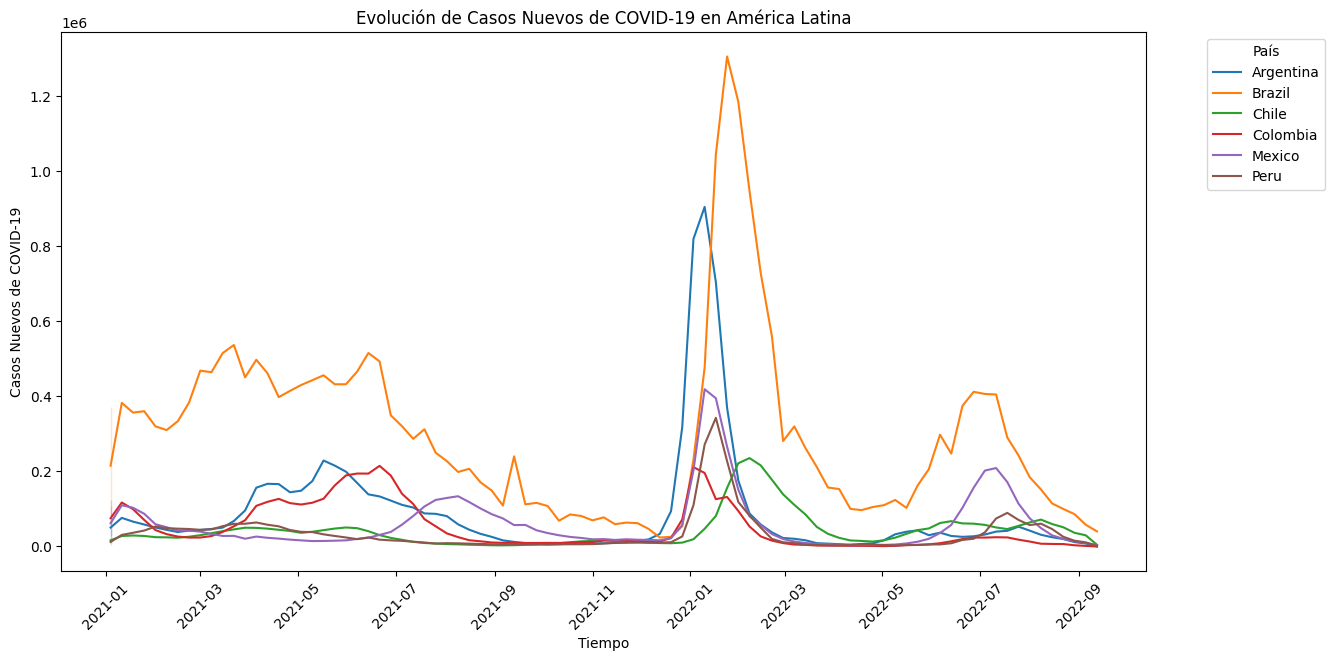

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")          

# Asegúrate de que la columna 'date' sea de tipo datetime
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Calcular la semana y el año a partir de la columna 'date'
df_Latam['week'] = df_Latam['date'].dt.isocalendar().week
df_Latam['year'] = df_Latam['date'].dt.isocalendar().year

# Calcular la suma semanal de casos nuevos de COVID-19 por país
weekly_cases = df_Latam.groupby(['country_name', 'year', 'week'])['new_confirmed'].sum().reset_index()

# Crear una columna de tiempo combinando el año y la semana para la visualización
weekly_cases['time'] = weekly_cases['year'].astype(str) + '-W' + weekly_cases['week'].astype(str)

# Convertir la columna de tiempo a un formato datetime adecuado para el eje X
weekly_cases['time'] = pd.to_datetime(weekly_cases['time'] + '-1', format='%Y-W%W-%w')

# Crear el gráfico de líneas para la evolución semanal
plt.figure(figsize=(14, 7))
sns.lineplot(x='time', y='new_confirmed', hue='country_name', data=weekly_cases)
plt.xlabel('Tiempo')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución de Casos Nuevos de COVID-19 en América Latina')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


El gráfico muestra una tendencia dinámica en la evolución de nuevos casos de COVID-19 en Latinoamérica, con distintas etapas que reflejan el impacto de las medidas de control y la vacunación.

1. Fase inicial (2020):
Se observa un aumento exponencial en el número de casos, evidenciando la rápida propagación del virus en la región.
La implementación de medidas de restricción y distanciamiento social durante este período contribuyó a detener el crecimiento exponencial y evitar el colapso de los sistemas de salud.

2. Fase de descenso (finales de 2020 y principios de 2021):
Se observa una disminución en el número de casos como consecuencia de las medidas de control y el inicio de la vacunación.
La vacunación se convierte en un factor clave para controlar la pandemia y proteger a la población, especialmente a los grupos de mayor riesgo.

3. Rebote de casos (primer semestre de 2022):
Se observa un nuevo aumento en el número de casos, coincidiendo con el levantamiento de las restricciones en muchos países.
Este rebote podría atribuirse a la relajación de las medidas de control, la aparición de nuevas variantes del virus y la fatiga social con respecto a las medidas de prevención.
Brasil se destaca como el país más afectado durante este período, evidenciando la importancia de mantener medidas de control y vacunación adecuadas, incluso en etapas avanzadas de la pandemia.

4. segundo semestre de 2022:
Se observa una nueva tendencia a la baja en el número de casos, sugiriendo un posible control de la ola de rebrotes.
La vacunación continua y la aplicación de medidas de control focalizadas podrían estar contribuyendo a esta tendencia.
En general, el gráfico proporciona información valiosa sobre la dinámica de la pandemia en Latinoamérica y permite identificar patrones y tendencias que pueden ser útiles para guiar las estrategias de salud pública.

Es importante destacar que la evolución de la pandemia puede verse afectada por diversos factores, como la aparición de nuevas variantes, la efectividad de las vacunas y el comportamiento social.

In [32]:
print(df_Latam['cumulative_vaccine_doses_administered'].describe())


count    3.750000e+03
mean     8.069876e+07
std      9.352964e+07
min      1.800000e+01
25%      1.599228e+07
50%      4.771301e+07
75%      9.408868e+07
max      3.478685e+08
Name: cumulative_vaccine_doses_administered, dtype: float64


In [33]:
print(df_Latam['cumulative_vaccine_doses_administered'].isna().any())


False


## estudiamos la evolucion de decesos a travez del tiempo

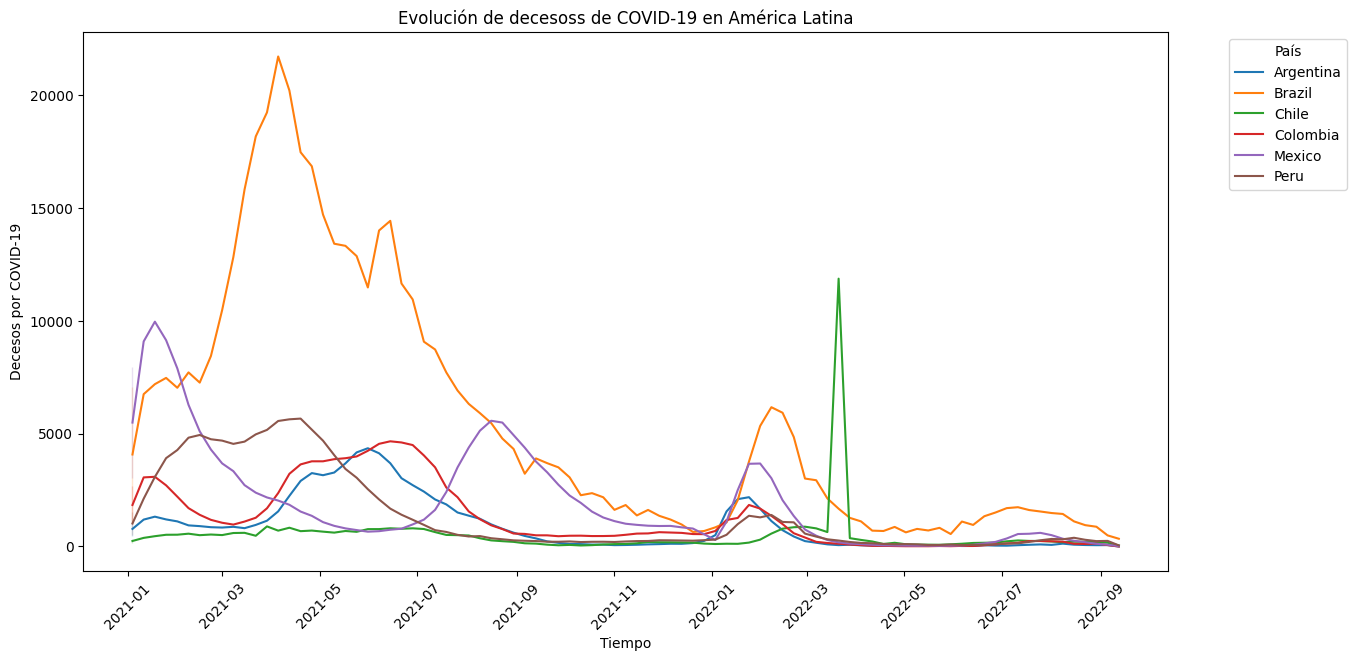

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")  

# Asegúrate de que la columna 'date' sea de tipo datetime
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Calcular la semana y el año a partir de la columna 'date'
df_Latam['week'] = df_Latam['date'].dt.isocalendar().week
df_Latam['year'] = df_Latam['date'].dt.isocalendar().year

# Calcular la suma semanal de casos nuevos de COVID-19 por país
weekly_cases = df_Latam.groupby(['country_name', 'year', 'week'])['new_deceased'].sum().reset_index()

# Crear una columna de tiempo combinando el año y la semana para la visualización
weekly_cases['time'] = weekly_cases['year'].astype(str) + '-W' + weekly_cases['week'].astype(str)

# Convertir la columna de tiempo a un formato datetime adecuado para el eje X
weekly_cases['time'] = pd.to_datetime(weekly_cases['time'] + '-1', format='%Y-W%W-%w')

# Crear el gráfico de líneas para la evolución semanal
plt.figure(figsize=(14, 7))
sns.lineplot(x='time', y='new_deceased', hue='country_name', data=weekly_cases)
plt.xlabel('Tiempo')
plt.ylabel('Decesos por COVID-19')
plt.title('Evolución de decesoss de COVID-19 en América Latina')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


El gráfico muestra una tendencia similar a la de nuevos casos, con un aumento inicial, una fase de descenso y un posterior rebote en los decesos por COVID-19 en Latinoamérica.

1. Fase inicial (2020):
Se observa un aumento exponencial en el número de muertes, reflejando el impacto severo de la pandemia en la región.
La falta de preparación de los sistemas de salud y la alta letalidad del virus contribuyeron a la elevada tasa de mortalidad durante este período.

2. Fase de descenso (finales de 2020 y principios de 2021):
Se observa una disminución en el número de muertes como consecuencia de las medidas de control y el inicio de la vacunación.
La vacunación fue un factor clave para proteger a los grupos de mayor riesgo y reducir la tasa de mortalidad.

3. Rebote de decesos (primer semestre de 2022):
Se observa un nuevo aumento en el número de muertes, coincidiendo con el levantamiento de las restricciones en muchos países.
Este rebote podría atribuirse a las mismas causas que el aumento de casos: relajación de medidas, nuevas variantes y fatiga social.
Aunque el repunte no fue tan pronunciado como al inicio de la pandemia, los valores de decesos se mantuvieron altos en comparación con períodos anteriores.

4. segundo semestre de 2022:
Se observa una nueva tendencia a la baja en el número de muertes, sugiriendo un posible control de la ola de rebrotes.
La vacunación continua y la aplicación de medidas de control focalizadas podrían estar contribuyendo a esta tendencia.
En general, el gráfico proporciona información valiosa sobre la relación entre las medidas de control y la tasa de mortalidad por COVID-19 en Latinoamérica.

## Población por Grupo Etario de cada País en estudio

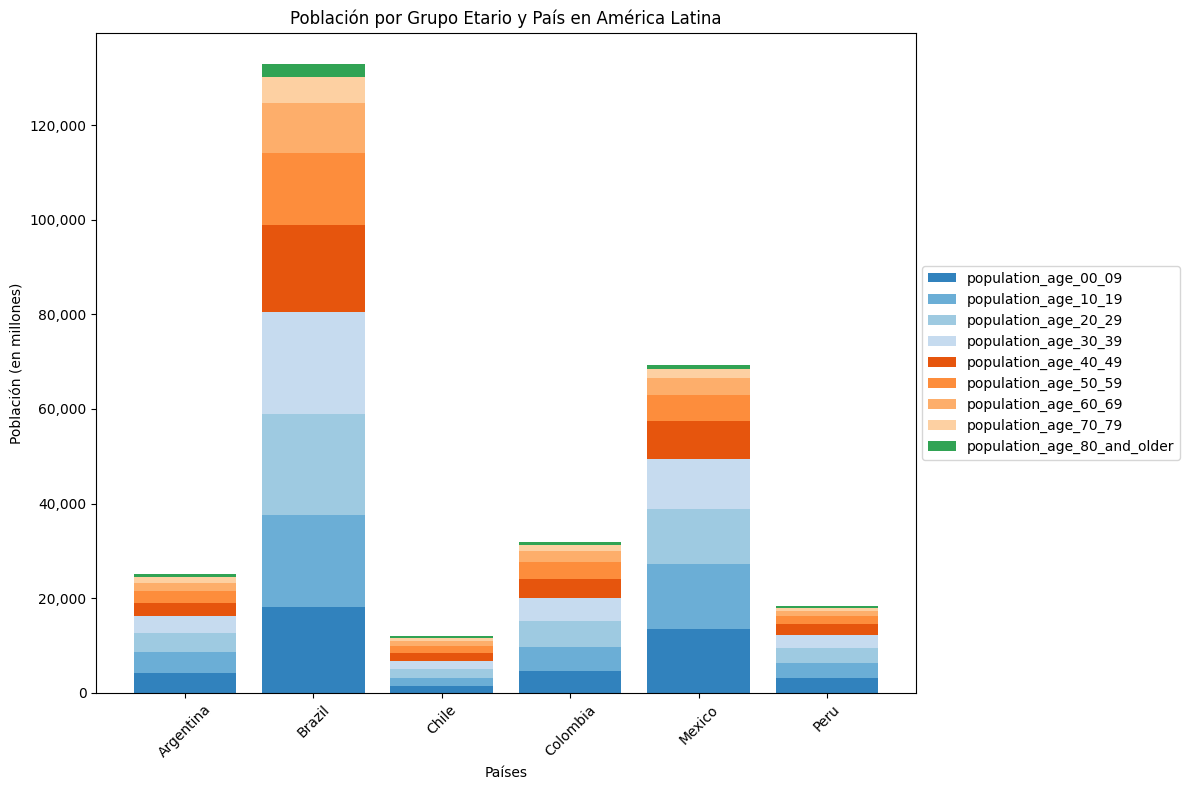

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Cargar el DataFrame desde el archivo CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Filtrar las columnas relevantes
cols_etarias = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Agrupar por país y sumar las poblaciones por grupo etario
df_grouped = df_Latam.groupby('country_name')[cols_etarias].sum().reset_index()

# Preparar los datos para el gráfico
countries = df_grouped['country_name'].tolist()
population_by_age = df_grouped[cols_etarias].values

# Convertir a millones para el eje y
population_by_age_millions = population_by_age / 1e6

# Definir colores para cada grupo etario usando un mapa de colores Matplotlib
cmap = plt.get_cmap('tab20c')
colors = [cmap(i) for i in range(len(cols_etarias))]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))

# Generar las barras apiladas
bars = None
for i in range(len(cols_etarias)):
    if i == 0:
        bars = plt.bar(countries, population_by_age_millions[:, i], color=colors[i], label=cols_etarias[i])
    else:
        bars += plt.bar(countries, population_by_age_millions[:, i], bottom=np.sum(population_by_age_millions[:, :i], axis=1), color=colors[i], label=cols_etarias[i])

# Ajustar el formato del gráfico
plt.xlabel('Países')
plt.ylabel('Población (en millones)')
plt.title('Población por Grupo Etario y País en América Latina')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Colocar la leyenda fuera del gráfico
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))  # Formato de millones sin notación científica
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El gráfico muestra una distribución de la población afectada por COVID-19 en Latinoamérica por grupo etario, revelando que todos los grupos han sido impactados por la pandemia en diferentes proporciones.

Si bien no se observa una afectación uniforme en todos los grupos etarios, es importante destacar que:

Los grupos de mayor edad (60 años y más) presentan una mayor tasa de mortalidad por COVID-19, debido a su mayor susceptibilidad a las complicaciones graves de la enfermedad.
Los grupos de edad intermedia (40-59 años) también se han visto afectados significativamente, tanto por la enfermedad en sí como por las medidas de control de la pandemia.
Los grupos más jóvenes (0-39 años) han presentado una menor tasa de mortalidad, pero no han sido inmunes al virus y han podido experimentar síntomas leves o graves, además de verse afectados por las medidas de control.
Es importante considerar que la distribución de la población afectada por COVID-19 puede variar entre países e incluso dentro de cada país, debido a diversos factores como:

Estructura poblacional: La proporción de personas en cada grupo etario puede variar entre países.
Comorbilidades: La prevalencia de enfermedades preexistentes, como diabetes, enfermedades cardíacas y enfermedades respiratorias, puede influir en la susceptibilidad al virus y la gravedad de la enfermedad.
Acceso a la atención médica: La calidad y disponibilidad de los servicios de salud pueden afectar el diagnóstico, tratamiento y pronóstico de la enfermedad.
Medidas de control: La implementación y efectividad de las medidas de control de la pandemia, como el distanciamiento social, el uso de máscaras y la vacunación, pueden influir en la transmisión del virus y la protección de diferentes grupos poblacionales.
En general, el gráfico proporciona información valiosa sobre la distribución de la población afectada por COVID-19 en Latinoamérica.

## Relacion entre el personal de salud de cada Pais en comparacion con su poblacion

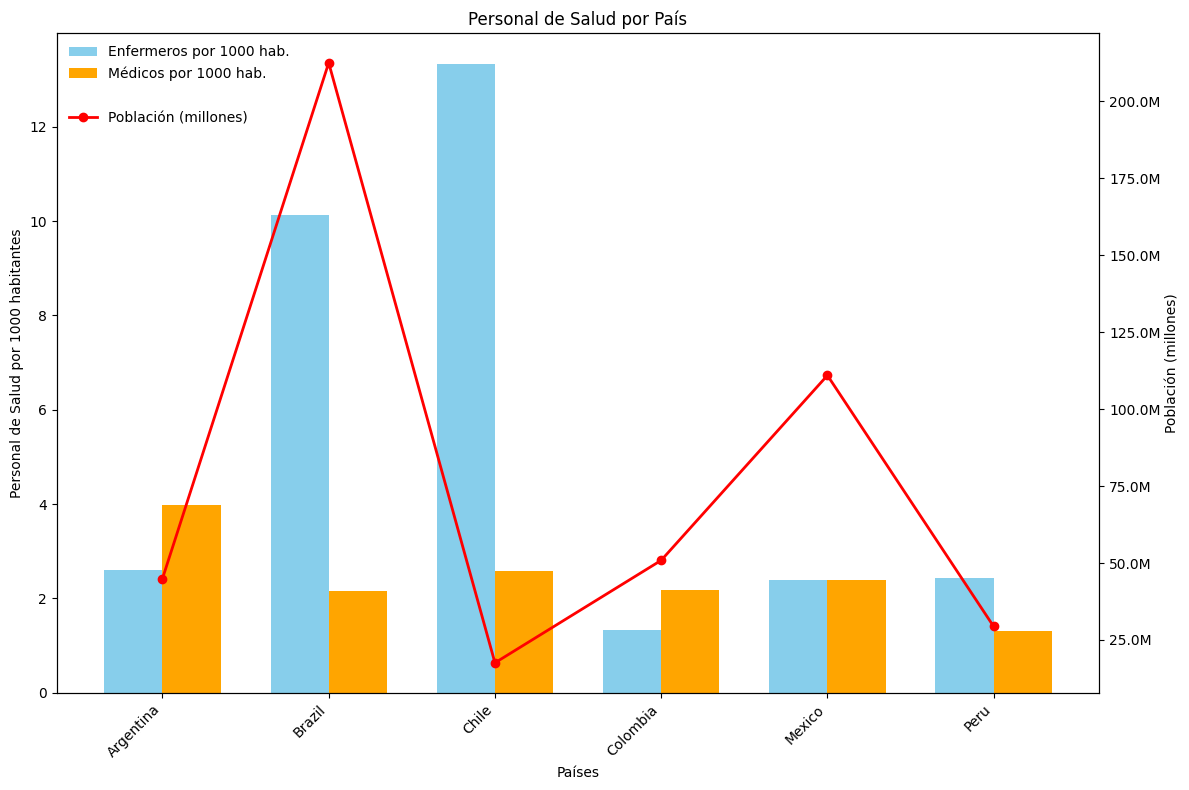

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el DataFrame desde el archivo CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Filtrar las columnas relevantes
cols_to_plot = ['country_name', 'nurses_per_1000', 'physicians_per_1000', 'population']

# Filtrar y limpiar datos (eliminar NaNs si es necesario)
df_filtered = df_Latam[cols_to_plot].dropna()

# Agrupar por país y tomar el primer valor para cada país
df_grouped = df_filtered.groupby('country_name').first().reset_index()

# Configurar variables para el gráfico
countries = df_grouped['country_name']
nurses_per_1000 = df_grouped['nurses_per_1000']
physicians_per_1000 = df_grouped['physicians_per_1000']
population = df_grouped['population'] / 1e6  # Convertir población a millones

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar columnas agrupadas (nurses_per_1000 y physicians_per_1000)
bar_width = 0.35
x = np.arange(len(countries))
bars1 = ax1.bar(x - bar_width/2, nurses_per_1000, bar_width, label='Enfermeros por 1000 hab.', color='skyblue')
bars2 = ax1.bar(x + bar_width/2, physicians_per_1000, bar_width, label='Médicos por 1000 hab.', color='orange')

# Configurar ejes y etiquetas
ax1.set_xlabel('Países')
ax1.set_ylabel('Personal de Salud por 1000 habitantes')
ax1.set_title('Personal de Salud por País')
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45, ha='right')

# Crear segundo eje y para la línea (población)
ax2 = ax1.twinx()
line = ax2.plot(x, population, color='red', marker='o', linestyle='-', linewidth=2, label='Población (millones)')

# Configurar ejes y etiquetas para el segundo eje y
ax2.set_ylabel('Población (millones)')

# Ajustar formato de los valores en el eje y para población
formatter = plt.FuncFormatter(lambda x, _: f'{x:.1f}M')
ax2.yaxis.set_major_formatter(formatter)

# Ajustar diseño del gráfico
fig.tight_layout()

# Agregar leyendas para las barras
bars = bars1 + bars2
labels = [bar.get_label() for bar in [bars1, bars2]]
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False)

# Agregar leyenda para la línea de población
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9), frameon=False)

# Mostrar gráfico
plt.tight_layout()
plt.show()


El gráfico que muestra la relación entre el personal de salud y la población en Latinoamérica revela una distribución desigual de recursos humanos en el sector sanitario de la región.

Se observa que:

Brasil, Chile y Argentina presentan una mayor cantidad de personal de salud por cada 1000 habitantes, lo que podría indicar una mejor capacidad para atender las necesidades de salud de su población.
Perú, México y Colombia tienen una menor cantidad de personal de salud por cada 1000 habitantes, lo que podría sugerir una potencial sobrecarga en el sistema sanitario y dificultades para brindar una atención adecuada a toda la población.
La población de cada país varía considerablemente, lo que implica que la cantidad total de personal de salud también es muy diferente entre los países. Brasil, por ejemplo, tiene la población más grande de la región y, en consecuencia, la mayor cantidad total de personal de salud.
Es importante considerar que la cantidad de personal de salud no es el único factor que determina la calidad de la atención médica.

Otros factores relevantes incluyen:

La distribución del personal de salud: Un país puede tener una cantidad adecuada de personal de salud en general, pero si este personal no está distribuido de manera equitativa en todo el territorio, algunas áreas podrían enfrentar escasez.
La calidad de la formación del personal de salud: Un país puede tener una gran cantidad de personal de salud, pero si la calidad de su formación no es adecuada, la atención médica podría no ser óptima.
La disponibilidad de recursos e infraestructura: Un país puede tener una cantidad adecuada de personal de salud bien capacitado, pero si no cuenta con los recursos e infraestructura necesarios para que puedan trabajar de manera eficiente, la calidad de la atención médica se verá afectada.
En general, el gráfico proporciona información valiosa sobre la distribución del personal de salud en relación con la población en Latinoamérica.

## Progreso de vacunacion por pais

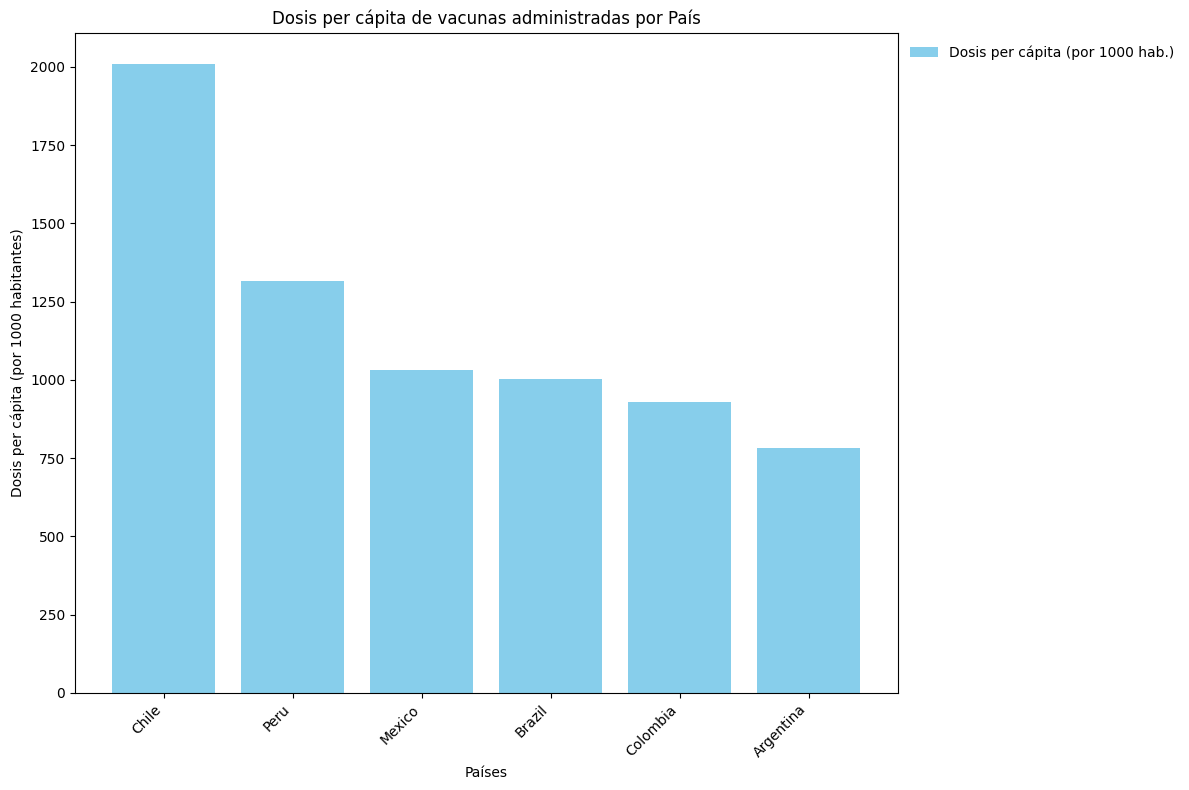

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el DataFrame desde el archivo CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")  

# Filtrar las columnas relevantes
cols_to_plot = ['country_name', 'cumulative_vaccine_doses_administered', 'population']

# Filtrar y limpiar datos (eliminar NaNs si es necesario)
df_filtered = df_Latam[cols_to_plot].dropna()

# Agrupar por país y sumar los valores
df_grouped = df_filtered.groupby('country_name').agg({
    'cumulative_vaccine_doses_administered': 'sum',
    'population': 'sum'
}).reset_index()

# Calcular dosis per cápita (por 1000 habitantes)
df_grouped['doses_per_capita'] = df_grouped['cumulative_vaccine_doses_administered'] / (df_grouped['population'] / 1000)

# Ordenar por dosis per cápita de mayor a menor
df_grouped = df_grouped.sort_values(by='doses_per_capita', ascending=False)

# Configurar variables para el gráfico
countries = df_grouped['country_name']
doses_per_capita = df_grouped['doses_per_capita']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar barras
bars = ax.bar(countries, doses_per_capita, color='skyblue')

# Configurar ejes y etiquetas
ax.set_xlabel('Países')
ax.set_ylabel('Dosis per cápita (por 1000 habitantes)')
ax.set_title('Dosis per cápita de vacunas administradas por País')
ax.set_xticks(np.arange(len(countries)))
ax.set_xticklabels(countries, rotation=45, ha='right')

# Agregar leyenda
ax.legend(['Dosis per cápita (por 1000 hab.)'], loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Ajustar diseño del gráfico
fig.tight_layout()

# Mostrar gráfico
plt.show()


El gráfico muestra una distribución desigual en la administración de dosis de vacunas contra el COVID-19 entre los países latinoamericanos.

Brasil se destaca como el país con mayor cantidad de dosis administradas en total, seguido de Argentina, Chile, Colombia, México y Perú.

Sin embargo, cuando se analiza la cantidad de dosis administradas por cada 1000 habitantes, Brasil se ubica en una posición intermedia, superado por países como Chile, Perú y Argentina.

Esta aparente contradicción se explica por el tamaño de la población de Brasil.

Al tener una población mucho más grande que los demás países latinoamericanos, Brasil necesita administrar una mayor cantidad de dosis para alcanzar el mismo nivel de cobertura por cada 1000 habitantes.

En general, los dos gráficos muestran que la distribución de vacunas contra el COVID-19 en Latinoamérica ha sido desigual.

Si bien Brasil ha administrado la mayor cantidad de dosis en total, su eficiencia en términos de dosis por cada 1000 habitantes es menor que la de otros países como Chile, Perú y Argentina.

Esta desigualdad en la distribución de vacunas podría tener un impacto en el control de la pandemia en la región.

## GDP y GDP per Capita por País

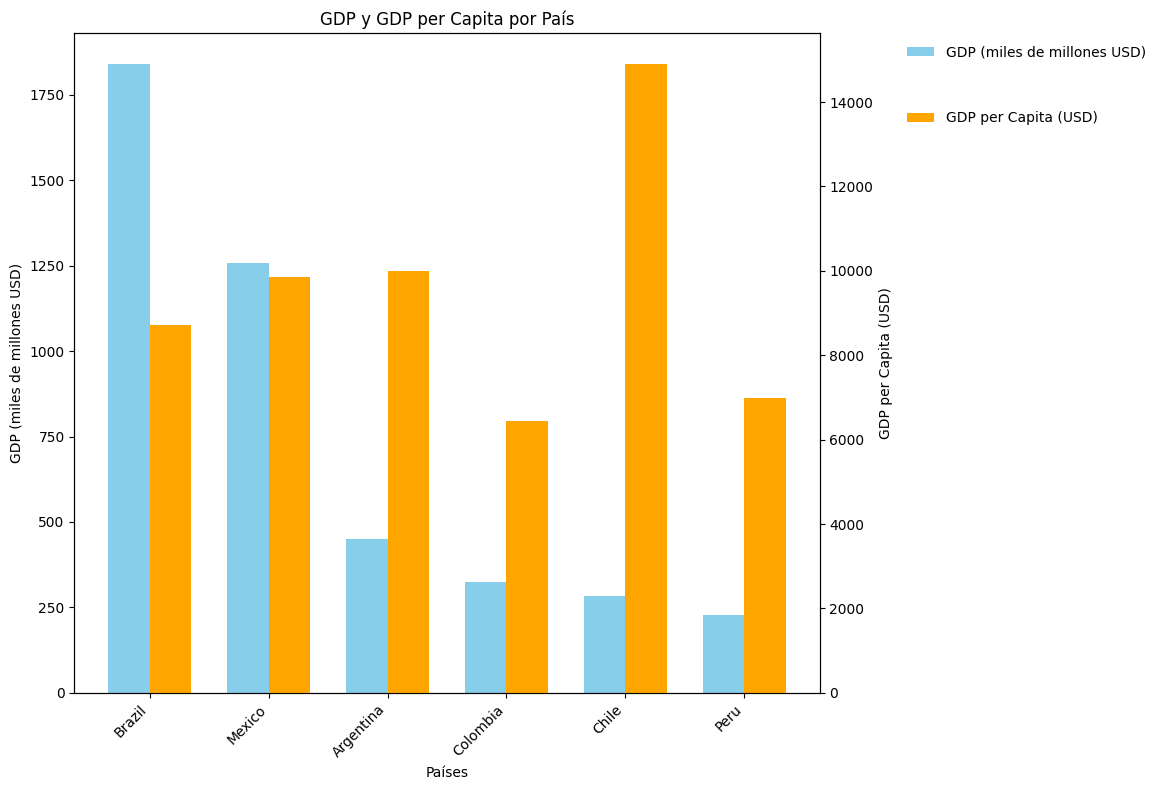

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el DataFrame desde el archivo CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Filtrar las columnas relevantes
cols_to_plot = ['country_name', 'gdp_usd', 'gdp_per_capita_usd']

# Filtrar y limpiar datos (eliminar NaNs si es necesario)
df_filtered = df_Latam[cols_to_plot].dropna()

# Agrupar por país y tomar el primer valor para cada país
df_grouped = df_filtered.groupby('country_name').first().reset_index()

# Ordenar por GDP
df_grouped = df_grouped.sort_values(by='gdp_usd', ascending=False)

# Configurar variables para el gráfico
countries = df_grouped['country_name']
gdp_usd = df_grouped['gdp_usd'] / 1e9  # Convertir GDP a miles de millones
gdp_per_capita_usd = df_grouped['gdp_per_capita_usd']

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar GDP
bar_width = 0.35
x = np.arange(len(countries))
bars1 = ax1.bar(x - bar_width/2, gdp_usd, bar_width, label='GDP (miles de millones USD)', color='skyblue')

# Crear segundo eje y para GDP per Capita
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, gdp_per_capita_usd, bar_width, label='GDP per Capita (USD)', color='orange')

# Configurar ejes y etiquetas
ax1.set_xlabel('Países')
ax1.set_ylabel('GDP (miles de millones USD)')
ax2.set_ylabel('GDP per Capita (USD)')
ax1.set_title('GDP y GDP per Capita por País')
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45, ha='right')

# Ajustar diseño del gráfico
fig.tight_layout()

# Agregar leyendas más afuera del gráfico
ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1), frameon=False)
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.9), frameon=False)

# Mostrar gráfico
plt.tight_layout()
plt.show()


El gráfico muestra una relación compleja entre la capacidad económica (PIB y PIB per cápita) y la respuesta al COVID-19 en Latinoamérica.

Se observan algunas tendencias generales:

Los países con mayor capacidad económica (Brasil y Argentina) también presentan una mayor cantidad de casos confirmados de COVID-19 por cada 1000 habitantes.
Los países con menor capacidad económica (Perú y Colombia) presentan una menor cantidad de casos confirmados de COVID-19 por cada 1000 habitantes.
Sin embargo, existen excepciones a estas tendencias:

Chile, con una capacidad económica intermedia, tiene una de las mayores cantidades de casos confirmados de COVID-19 por cada 1000 habitantes.
México, con una capacidad económica intermedia, tiene una de las menores cantidades de casos confirmados de COVID-19 por cada 1000 habitantes.
Es importante considerar que la cantidad de casos confirmados de COVID-19 puede verse afectada por diversos factores, como la cantidad de pruebas realizadas, la calidad de los sistemas de vigilancia epidemiológica y las medidas de control de la pandemia.

Además, es importante tener en cuenta que los datos del gráfico pueden no estar completamente actualizados o completos.

En general, el gráfico proporciona información valiosa sobre la relación entre la capacidad económica y la respuesta al COVID-19 en Latinoamérica.

Sin embargo, es necesario un análisis más profundo que considere los factores mencionados anteriormente para comprender mejor las causas de esta relación y para diseñar estrategias de salud pública efectivas para controlar la pandemia en la región.

## Prevalencia de fumadores y de diabetes en la poblacion por pais

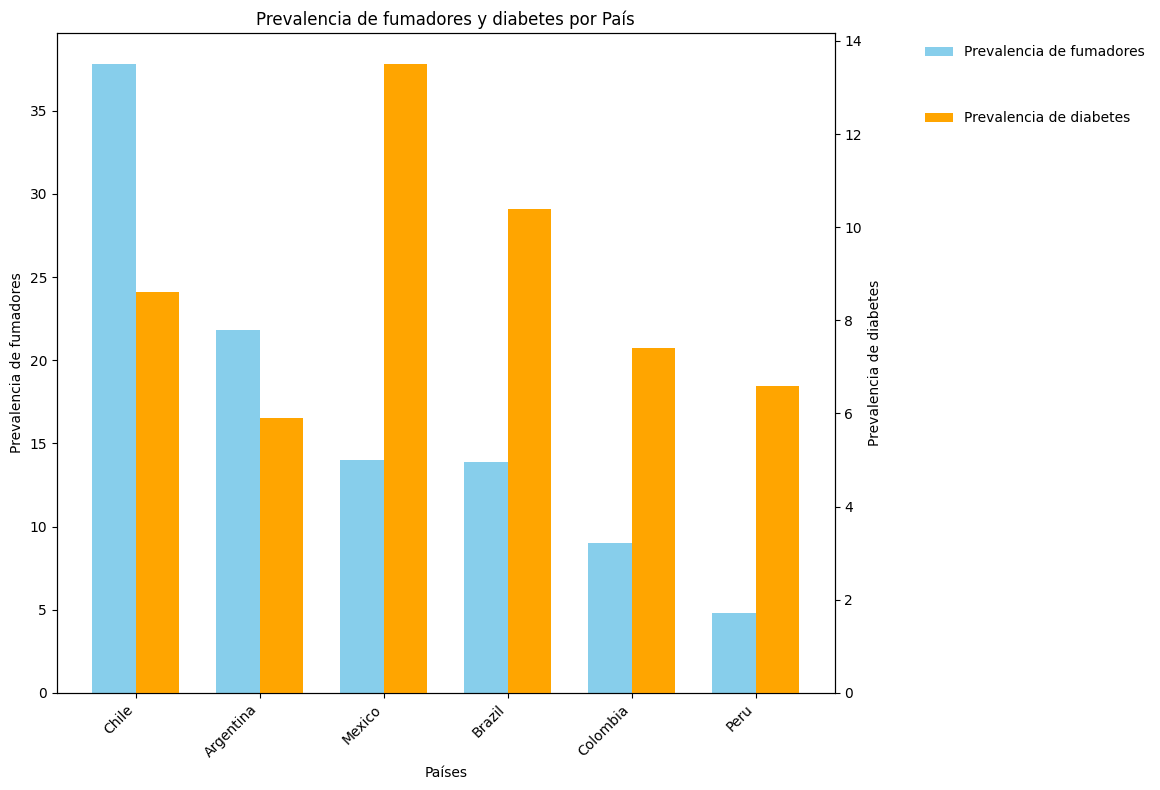

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el DataFrame desde el archivo CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Filtrar las columnas relevantes
cols_to_plot = ['country_name', 'smoking_prevalence', 'diabetes_prevalence']

# Filtrar y limpiar datos (eliminar NaNs si es necesario)
df_filtered = df_Latam[cols_to_plot].dropna()

# Agrupar por país y tomar el primer valor para cada país
df_grouped = df_filtered.groupby('country_name').first().reset_index()

# Ordenar por 'smoking_prevalence'
df_grouped = df_grouped.sort_values(by='smoking_prevalence', ascending=False)

# Configurar variables para el gráfico
countries = df_grouped['country_name']
smoking_prevalence = df_grouped['smoking_prevalence']
diabetes_prevalence = df_grouped['diabetes_prevalence']

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar prevalencia de fumadores
bar_width = 0.35
x = np.arange(len(countries))
bars1 = ax1.bar(x - bar_width/2, smoking_prevalence, bar_width, label='Prevalencia de fumadores', color='skyblue')

# Crear segundo eje y para prevalencia de diabetes
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, diabetes_prevalence, bar_width, label='Prevalencia de diabetes', color='orange')

# Configurar ejes y etiquetas
ax1.set_xlabel('Países')
ax1.set_ylabel('Prevalencia de fumadores')
ax2.set_ylabel('Prevalencia de diabetes')
ax1.set_title('Prevalencia de fumadores y diabetes por País')
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45, ha='right')

# Ajustar diseño del gráfico
fig.tight_layout()

# Agregar leyendas fuera del gráfico
ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1), frameon=False)
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.9), frameon=False)

# Mostrar gráfico
plt.tight_layout()
plt.show()


El análisis de los gráficos y la información proporcionada permite concluir que el tabaquismo, la diabetes y el COVID-19 están estrechamente relacionados y han tenido un impacto significativo en la salud de la población latinoamericana.

A continuación, se resumen los puntos clave de esta relación:

Relación entre el tabaquismo y la diabetes:

El tabaquismo es un factor de riesgo importante para desarrollar diabetes tipo 2.
Fumar aumenta la resistencia a la insulina y daña las células del páncreas que producen insulina.
Las personas que fuman tienen un mayor riesgo de sufrir complicaciones de la diabetes, como enfermedades cardíacas, accidentes cerebrovasculares, enfermedades renales y ceguera.
Relación entre la diabetes y el COVID-19:

Las personas con diabetes tienen un mayor riesgo de desarrollar COVID-19 grave.
La diabetes debilita el sistema inmunológico y aumenta la inflamación, lo que hace que las personas sean más susceptibles a las infecciones y a las complicaciones graves del COVID-19.
Las personas con diabetes que contraen COVID-19 tienen un mayor riesgo de hospitalización, ingreso en la UCI y muerte.
Impacto de la pandemia de COVID-19 en el tabaquismo y la diabetes:

La pandemia ha tenido un impacto negativo en los esfuerzos para prevenir y controlar el tabaquismo y la diabetes.
Las interrupciones en los servicios de salud y el distanciamiento social han dificultado el acceso a la atención y el apoyo para las personas con estas condiciones.

## Tasas de Mortalidad por País

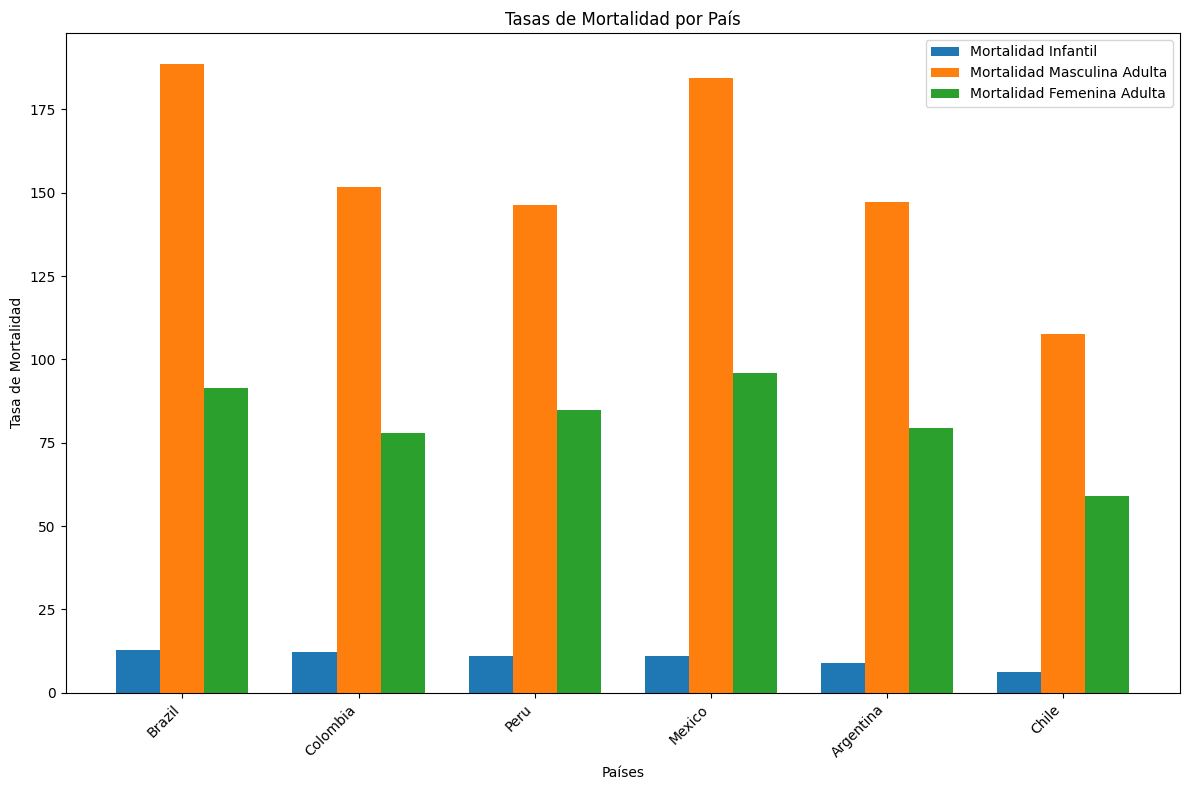

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el DataFrame desde el archivo CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Filtrar las columnas relevantes
cols_to_plot = ['country_name', 'infant_mortality_rate', 'adult_male_mortality_rate', 'adult_female_mortality_rate']

# Filtrar y limpiar datos (eliminar NaNs si es necesario)
df_filtered = df_Latam[cols_to_plot].dropna()

# Agrupar por país y tomar el primer valor para cada país
df_grouped = df_filtered.groupby('country_name').first().reset_index()

# Ordenar por alguna de las tasas de mortalidad (por ejemplo, infant_mortality_rate)
df_grouped = df_grouped.sort_values(by='infant_mortality_rate', ascending=False)

# Configurar variables para el gráfico
countries = df_grouped['country_name']
infant_mortality_rate = df_grouped['infant_mortality_rate']
adult_male_mortality_rate = df_grouped['adult_male_mortality_rate']
adult_female_mortality_rate = df_grouped['adult_female_mortality_rate']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar barras apiladas
bar_width = 0.25
x = np.arange(len(countries))
bars1 = ax.bar(x - bar_width, infant_mortality_rate, bar_width, label='Mortalidad Infantil')
bars2 = ax.bar(x, adult_male_mortality_rate, bar_width, label='Mortalidad Masculina Adulta')
bars3 = ax.bar(x + bar_width, adult_female_mortality_rate, bar_width, label='Mortalidad Femenina Adulta')

# Configurar ejes y etiquetas
ax.set_xlabel('Países')
ax.set_ylabel('Tasa de Mortalidad')
ax.set_title('Tasas de Mortalidad por País')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Ajustar diseño del gráfico
fig.tight_layout()

# Agregar leyenda
ax.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


El gráfico muestra una variación significativa en las tasas de mortalidad infantil, masculina adulta y femenina adulta por COVID-19 en diferentes países de Latinoamérica.

Se observan algunas tendencias generales:

Los países con mayor tasa de mortalidad infantil por COVID-19 (Brasil y Perú) también tienen una tasa de mortalidad masculina adulta y femenina adulta relativamente alta.
Los países con menor tasa de mortalidad infantil por COVID-19 (México y Argentina) también tienen una tasa de mortalidad masculina adulta y femenina adulta relativamente baja.
Sin embargo, existen excepciones a estas tendencias:

Colombia tiene una tasa de mortalidad infantil por COVID-19 similar a la de Brasil y Perú, pero una tasa de mortalidad masculina adulta y femenina adulta significativamente más baja.
Chile tiene una tasa de mortalidad infantil por COVID-19 similar a la de México y Argentina, pero una tasa de mortalidad masculina adulta significativamente más alta.
Es importante considerar que las tasas de mortalidad por COVID-19 pueden verse afectadas por diversos factores, como la edad de la población, la prevalencia de comorbilidades, la calidad de la atención médica, las medidas de control de la pandemia y la cobertura de vacunación.

En general, el gráfico proporciona información valiosa sobre las variaciones en las tasas de mortalidad por COVID-19 en Latinoamérica.

Sin embargo, es necesario un análisis más profundo que considere los factores mencionados anteriormente para comprender mejor las causas de estas variaciones y para diseñar estrategias de salud pública efectivas para reducir la mortalidad por COVID-19 en la región.